In [7]:
!pip install scikit-learn

In [8]:
#Importing Dependancies
import pandas as pd
import numpy as np
import sklearn 
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style

In [10]:
student_dataset = pd.read_csv('dataset/student-mat.csv',sep=';')
student_dataset = student_dataset[['G1','G2','G3','failures','absences']]
print(student_dataset)

     G1  G2  G3  failures  absences
0     5   6   6         0         6
1     5   5   6         0         4
2     7   8  10         3        10
3    15  14  15         0         2
4     6  10  10         0         4
..   ..  ..  ..       ...       ...
390   9   9   9         2        11
391  14  16  16         0         3
392  10   8   7         3         3
393  11  12  10         0         0
394   8   9   9         0         5

[395 rows x 5 columns]


In [11]:
predict = "G3"
X = np.array(student_dataset.drop([predict],1))
y = np.array(student_dataset[predict])

<ipython-input-11-a5fc91da27c5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(student_dataset.drop([predict],1))


In [14]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X , y , test_size= 0.1)
Ultron = linear_model.LinearRegression()
Ultron.fit(x_train,y_train)
accuracy = Ultron.score(x_test,y_test)
print("ULTRON'S Accuracy at "+str(accuracy*100)+"%")

ULTRON'S Accuracy at 92.35994595502072%


In [15]:
print("Coefficients : ",Ultron.coef_)
print("Intercept : ",Ultron.intercept_)

Coefficients :  [ 0.15469008  0.97596457 -0.30292241  0.03853545]
Intercept :  -1.8957191489011933


In [16]:
predictions = Ultron.predict(x_test)
for i in range(len(predictions)):
    print("ULTRON's Predicted G3 - ",predictions[i],". Actual G3 - ",y_test[i],".")

ULTRON's Predicted G3 -  7.970792536442266 . Actual G3 -  8 .
ULTRON's Predicted G3 -  15.063552330401631 . Actual G3 -  15 .
ULTRON's Predicted G3 -  5.891227065840993 . Actual G3 -  7 .
ULTRON's Predicted G3 -  6.3178217307819455 . Actual G3 -  10 .
ULTRON's Predicted G3 -  5.197040645058173 . Actual G3 -  6 .
ULTRON's Predicted G3 -  12.879862207456082 . Actual G3 -  13 .
ULTRON's Predicted G3 -  10.463862824673459 . Actual G3 -  11 .
ULTRON's Predicted G3 -  12.26701136164988 . Actual G3 -  13 .
ULTRON's Predicted G3 -  14.90941051950449 . Actual G3 -  15 .
ULTRON's Predicted G3 -  12.212729533568968 . Actual G3 -  13 .
ULTRON's Predicted G3 -  18.146684387071367 . Actual G3 -  18 .
ULTRON's Predicted G3 -  18.30137446971419 . Actual G3 -  18 .
ULTRON's Predicted G3 -  12.725172124813259 . Actual G3 -  13 .
ULTRON's Predicted G3 -  12.752225871708966 . Actual G3 -  13 .
ULTRON's Predicted G3 -  12.492862864976187 . Actual G3 -  14 .
ULTRON's Predicted G3 -  10.849765623661995 . Act

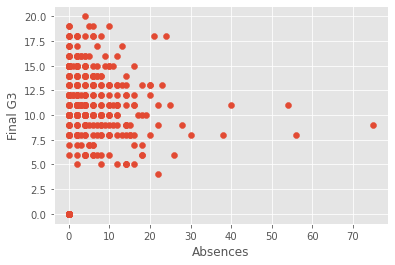

In [17]:
style.use("ggplot")
plt.scatter(student_dataset['absences'],student_dataset['G3'])
plt.xlabel('Absences')
plt.ylabel('Final G3')
plt.show()

In [21]:
import pickle


In [23]:
with open('model_pickle','wb') as f:
    pickle.dump(Ultron, f)

In [24]:
with open('model_pickle','rb') as file:
    ultron = pickle.load(file)

In [34]:
print("Predicted value : {0} , Actual Value : {0} ".format(Ultron.predict(x_test[[6]])), y_test[6])

Predicted value : [10.46386282] , Actual Value : [10.46386282]  11


In [38]:
from joblib import dump, load

In [40]:
dump(Ultron, 'revised_model')

['revised_model']